In [84]:
from jsonschema import validate

In [4]:
schema = {"type" : "object",
          "properties" : {
              "price" : {"type" : "number"},
              "name" : {"type" : "string"},
          },
         }

In [5]:
print(validate(instance={"name" : "Eggs", "price" : 8.77}, schema=schema))

None


In [6]:
v = None
try:
    validate(instance={"name" : "Eggs", "price" : "invalid"}, schema=schema)
    print('ok')
except:
    print('error')

error


In [7]:
import ruptures as rpt
import json
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

In [8]:
data = '''[
{"name" : "Eggs", "price" : 8.88},
{"name" : "Eggs", "price" : 8.15},
{"name" : "Eggs", "price" : 8.77},
{"name" : "Eggs", "price" : 8.76},
{"name" : "Eggs", "price" : 8.72},
{"name" : "Eggs", "price" : 8.64},
{"name" : "Eggs", "price" : 8.88},
{"name" : "Eggs", "price" : 8.15},
{"name" : "Eggs", "price" : 8.77},
{"name" : "Eggs", "price" : 8.72},
{"name" : "Eggs", "price" : 8.64},
{"name" : "Eggs", "price" : 8.88},
{"name" : "Eggs", "price" : 8.76},
{"name" : "Eggs", "price" : 8.72},
{"name" : "Eggs", "price" : 8.72},
{"name" : "Eggs", "price" : 8.15},
{"name" : "Eggs", "price" : 8.72},
{"name" : "Eggs", "price" : 8.72},
{"name" : "Eggs", "price" : 8.15}
]'''

In [9]:
samples = json.loads(data)

In [10]:
schema = {"type" : "object", "properties" : {"price" : {"type" : "number"}, "name" : {"type" : "string"}}}

In [11]:
for key in schema["properties"].keys():
    if schema["properties"][key]["type"] == "string":
        break

In [12]:
key

'name'

In [13]:
prices = []
for sample in samples:
    prices.append(len(sample["name"]))
    print(sample["name"])

Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs


In [14]:
prices = []
for sample in samples:
    prices.append(sample["price"])

In [15]:
prices = np.array(prices)
print(np.where(prices == max(prices)))
print(np.where(prices == min(prices)))
len(prices)

(array([ 0,  6, 11]),)
(array([ 1,  7, 15, 18]),)


19

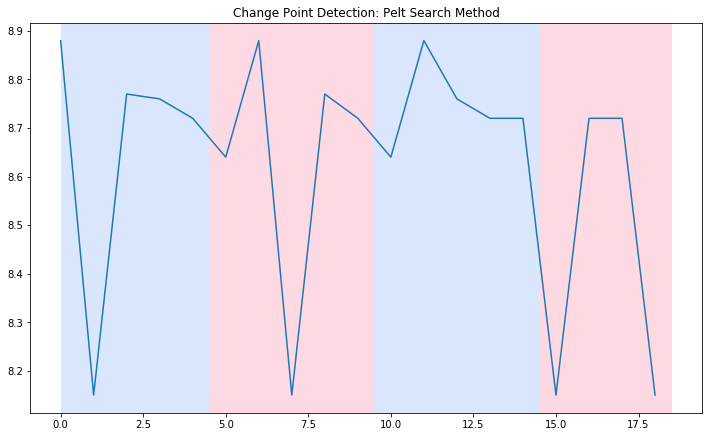

In [16]:
model = "l2"  
algo = rpt.Binseg(model=model).fit(prices)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(prices, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()

In [17]:
print(my_bkps)

[5, 10, 15, 19]


In [18]:
(len(my_bkps)- int(my_bkps[-1]/5))

1

In [19]:
a = np.array([[1,2,3],[1,3,2]])
b = [[1,2,],[1],[2]]

In [20]:
type(a[0][0]) == np.int64

True

In [21]:
int(my_bkps[-1] % 5 in {1,2})

0

In [22]:
import json
import random

items = ['eggs', 'milk', 'cheese', 'bread', 'porridge']
names = ['Misha', 'Lena', 'Ivan', 'Nikita', 'Aleksandr', 'Fillip', 'fhfhfkksfklfjllflfalnfl']

# есть поле текст n шагов, а после n+1 - нет
def error1(n):
    data_arr = []
    n = int(n)
    for i in range(n):
        data = {}
        data['name'] = random.choice(items)
        data['price'] = random.randrange(8, 9) + round(random.random(), 3)
        data['count'] = random.randint(1,10)
        data['customer name'] = random.choice(names)
        data['phone number'] = "+79" + str(random.randint(111111111,999999999))
        data_arr.append(data)
    for i in range(int(n / 5)):
        data = {}
        data['name'] = ''
        data['price'] = random.randrange(8, 9) + round(random.random(), 3)
        data['count'] = random.randint(1,10)
        data['customer name'] = random.choice(names)
        data['phone number'] = "+79" + str(random.randint(111111111,999999999))
        data_arr.append(data)
    with open('anomaly1.json', 'w') as json_file:
        json.dump(data_arr, json_file)

In [23]:
error1(100)

In [24]:
def error2(n):
    data_arr = []
    n = int(n)
    for i in range(n):
        data = {}
        data['name'] = random.choice(items)
        data['price'] = random.randrange(8, 9) + round(random.random(), 3)
        data['count'] = random.randint(1,10)
        if random.random() < 0.589:
            data["customer name"] = random.choice(names)
        else:
            data["customer name"] = ''
        data['phone number'] = "+79" + str(random.randint(111111111,999999999))
        data_arr.append(data)
    for i in range(int(n / 5)):
        data = {}
        data["customer name"] = ''
        data['name'] = random.choice(items)
        data['price'] = random.randrange(8, 9) + round(random.random(), 3)
        data['count'] = random.randint(1,10)
        data['phone number'] = "+79" + str(random.randint(111111111,999999999))
        data_arr.append(data)
    with open('anomaly2.json', 'w') as json_file:
        json.dump(data_arr, json_file)

In [25]:
error2(100)

In [26]:
def error3(n):
    data_arr = []
    n = int(n)
    for i in range(n):
        data = {}
        data['name'] = random.choice(items)
        data['price'] = random.randrange(8, 9) + round(random.random(), 3)
        data['count'] = random.randint(1,10)
        data['customer name'] = random.choice(names)
        data['phone number'] = "+79" + str(random.randint(111111111,999999999))
        data_arr.append(data)
    for i in range(int(n)):
        data = {}
        data['name'] = random.choice(items)
        data['price'] = random.randrange(50, 70) + round(random.random(), 3)
        data['count'] = random.randint(1,10)
        data['customer name'] = random.choice(names)
        data['phone number'] = "+79" + str(random.randint(111111111,999999999))
        data_arr.append(data)
    with open('anomaly3.json', 'w') as json_file:
        json.dump(data_arr, json_file)

In [27]:
error3(100)

In [28]:
def error4(n):
    data_arr = []
    n = int(n)
    for i in range(n):
        data = {}
        data['name'] = random.choice(items)
        data['price'] = random.randrange(8, 9) + round(random.random(), 3)
        data['count'] = random.randint(10,10)
        data['customer name'] = random.choice(names)
        data['phone number'] = "+79" + str(random.randint(111111111,999999999))
        data_arr.append(data)
    for i in range(int(n/ 5)):
        data = {}
        data['name'] = random.choice(items)
        data['price'] = random.randrange(8, 9) + round(random.random(), 3)
        data['count'] = random.randint(10,10)
        data['customer name'] = random.choice(names)
        data['phone number'] = "8(9" + str(random.randint(11,99))+')' + str(random.randint(1111111,9999999))
        data_arr.append(data)
    with open('anomaly4.json', 'w') as json_file:
        json.dump(data_arr, json_file)

In [29]:
error4(100)

In [67]:
with open('anomaly4.json', 'r') as json_file:
    data = json.loads(json_file.read())

In [68]:
with open('collections.json', 'r') as json_file:
    data2 = json.loads(json_file.read())

In [82]:
schema = {"id" : {"type" : "number"}, "type" : "object", "properties" : {"price" : {"type" : "number"}, "count" : {"type" : "number"}, "name" : {"type" : "string"}, "customer name" : {"type" : "string"}, "phone number": {"type" : "string"}}, "required": [ "name" ]}

In [70]:
for key in schema["properties"].keys():
    if schema["properties"][key]["type"] == "string":
        break

In [71]:
key

'name'

In [77]:
prices = []
for sample in data2 + data:
    prices.append(len(sample["phone number"]))

In [78]:
prices = np.array(prices)
n = len(prices)
prices

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13])

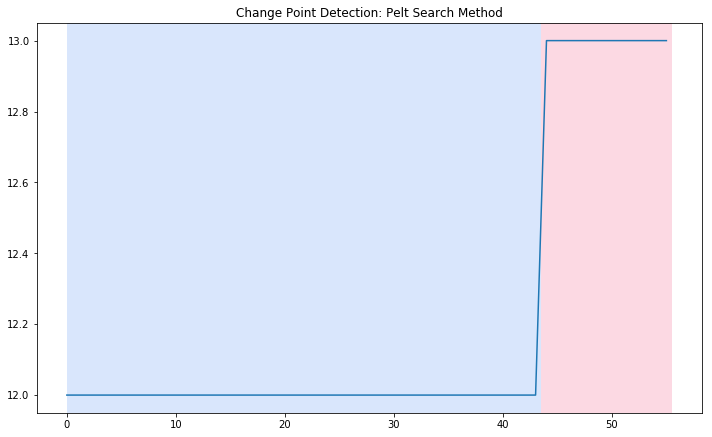

In [80]:
model="l1"
algo = rpt.Pelt(model=model, min_size=1, jump=1).fit(prices)
result = algo.predict(pen=5)
rpt.show.display(prices, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()

In [37]:
result

[120]

In [38]:
def error5(n):
    data_arr = []
    n = int(n)
    for i in range(n):
        data = {}
        data['name'] = random.choice(items)
        data['price'] = random.randrange(8, 9) + round(random.random(), 3)
        data['count'] = random.randint(1,10)
        data["customer name"] = random.choice(names)
        data['phone number'] = "+79" + str(random.randint(111111111,999999999))
        data_arr.append(data)
    for i in range(int(n / 10)):
        data = {}
        data['name'] = random.choice(items)
        data['price'] = random.randrange(8, 9) + round(random.random(), 3)
        data['phone number'] = "+79" + str(random.randint(111111111,999999999))
        data_arr.append(data)
    with open('anomaly5.json', 'w') as json_file:
        json.dump(data_arr, json_file)

In [39]:
error5(50)

In [40]:
with open('anomaly5.json', 'r') as json_file:
    data = json.loads(json_file.read())

In [41]:
len(data[0].keys())

5

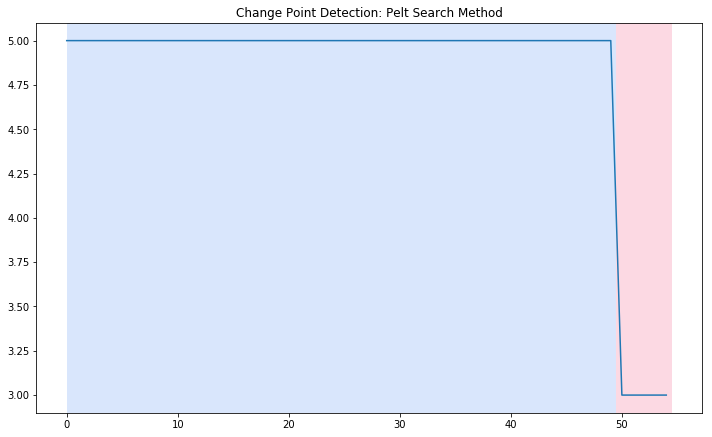

In [42]:
numbers = []
for sample in data:
    numbers.append(len(sample.keys()))
numbers = np.array(numbers)
model = "l1"
algo = rpt.Pelt(model=model, min_size=1, jump=1).fit(numbers)
result = algo.predict(pen=5)
rpt.show.display(numbers, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()

In [43]:
numbers.max()

5

In [44]:
result

[50, 55]

In [45]:
json.dumps

<function json.dumps(obj, *, skipkeys=False, ensure_ascii=True, check_circular=True, allow_nan=True, cls=None, indent=None, separators=None, default=None, sort_keys=False, **kw)>

In [112]:
schemas = [{"id" : 1, "type" : "object", "properties" : {"price" : {"type" : "number"}, "count" : {"type" : "number"}, "name" : {"type" : "string"}, "customer name" : {"type" : "string"}, "phone number": {"type" : "string"}}, "required": [ "name", "id" ]},
          {"id" : 2, "type" : "object", "properties" : {"price" : {"type" : "number"}, "count" : {"type" : "number"}, "name" : {"type" : "string"}, "customer name" : {"type" : "string"}, "phone number": {"type" : "string"}}, "required": [ "name", "id" ]}]

In [109]:
from jsonschema import validate
validate(instance={"id": 3, "name": "porridge", "price": 8.2, "count": 1, "customer name": "Nikita", 
                   "phone number": "+79451233408"}, schema=schema)

In [110]:
js = {"id": 1, "name": "porridge", "price": 8.2, "count": 1, "customer name": "Nikita", 
                   "phone number": "+79451233408"}

In [121]:
schema = filter(lambda t: t["id"] == 3, schemas)

In [123]:
schema = list(schema)
schema

[]

In [134]:
js = '{"id" : 2, "type" : "object", "properties" : {"price" : {"type" : "number"}, "count" : {"type" : "number"}, "name" : {"type" : "string"}, "customer name" : {"type" : "string"}, "phone number": {"type" : "string"}}, "required": [ "name", "id" ]}'

In [150]:
j ='{"type" : "object", "properties" : { "legs" : {"type" : "number"}}}'

In [151]:
j = json.loads(j)

In [152]:
s = 'hi'
int(s)

ValueError: invalid literal for int() with base 10: 'hi'